<a href="https://colab.research.google.com/github/sudhara/datasciencecoursera/blob/master/project_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

library(ggplot2)
library(dplyr)

In [25]:

house <- read.table("./sample_data/kc_house_data.csv", header= TRUE, sep = ",")
summary(house)


       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

In [ ]:
install.packages()

In [16]:
house$zipcode <- as.factor(house$zipcode)
house$yr_built <- as.factor(house$yr_built)
house$yr_renovated <- as.factor(house$yr_renovated)
house$bedrooms <- as.factor(house$bedrooms)
house$bathrooms <- as.factor(house$bathrooms)
house$condition <- as.factor(house$condition)
house$grade <- as.factor(house$grade)
house$waterfront <- as.factor(house$waterfront)
house$view <- as.factor(house$view)

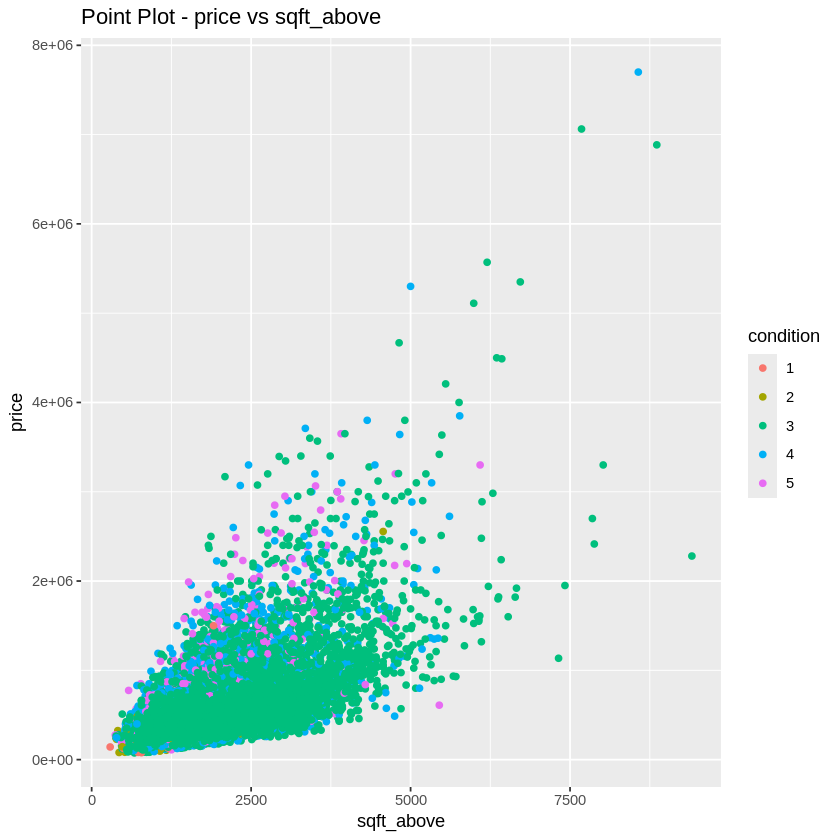

In [17]:
ggplot(data=house) + geom_point(mapping=aes(x=sqft_above, y=price, color=condition)) +ggtitle("Point Plot - price vs sqft_above")

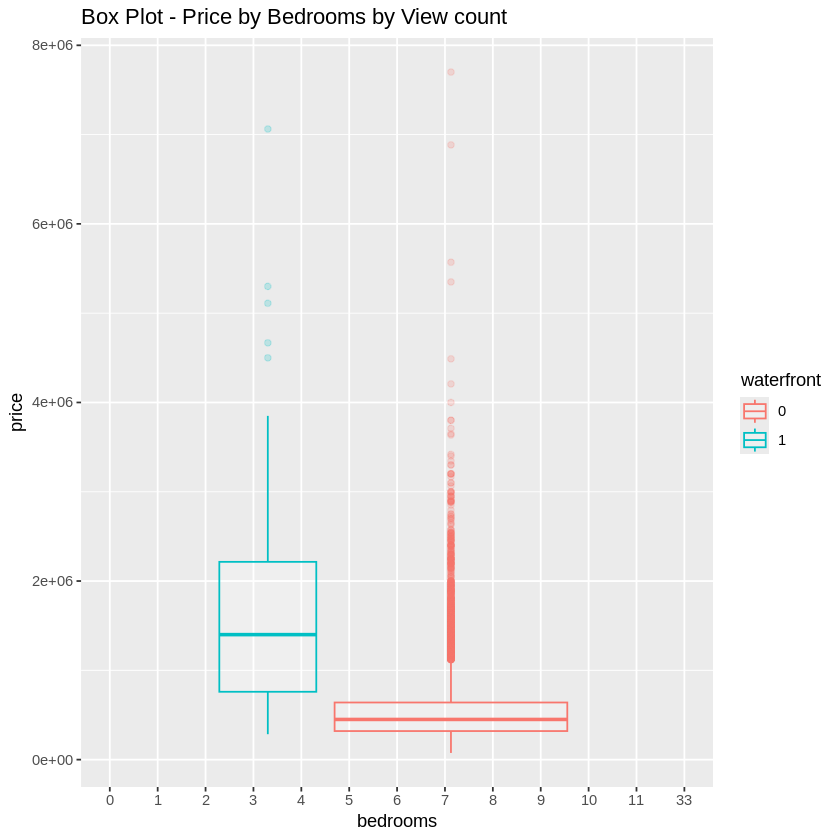

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


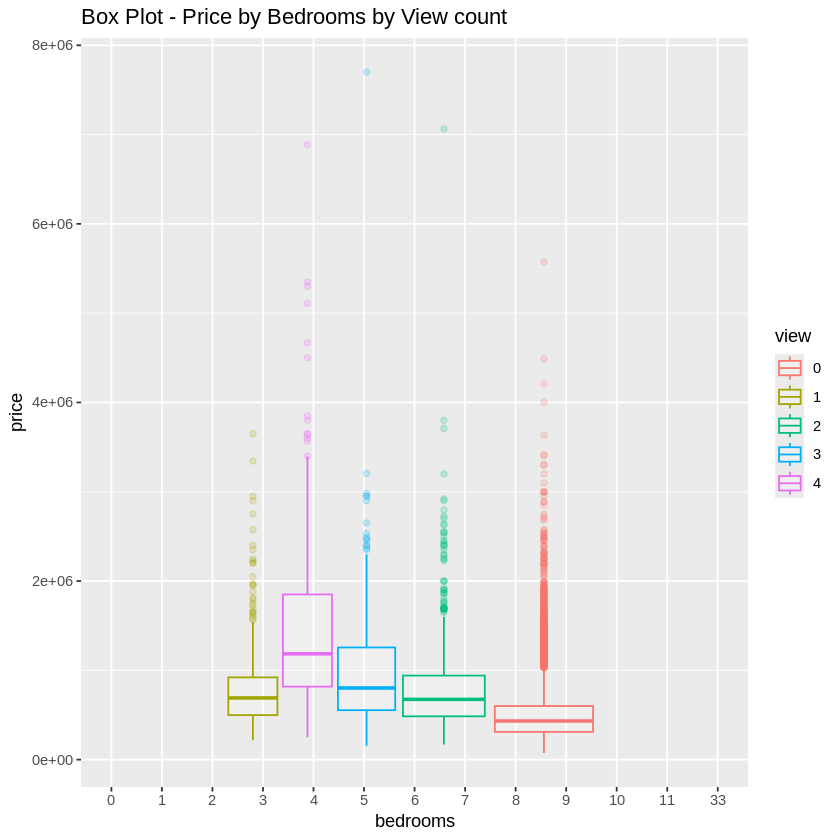

ERROR: Error in +ggtitle("Point Plot - price vs sqft_above"): invalid argument to unary operator


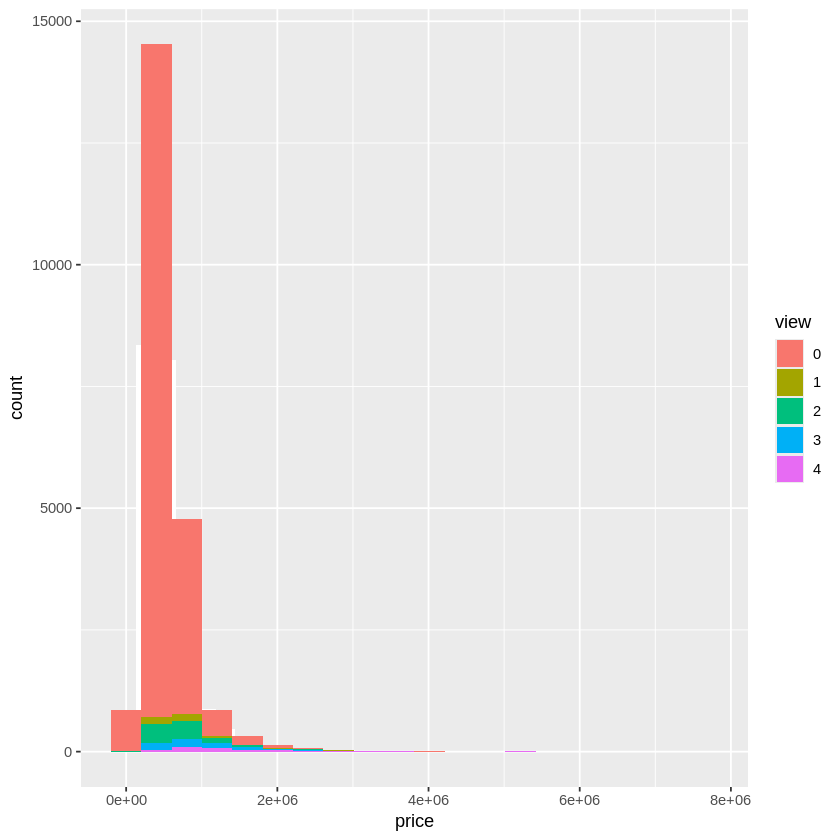

In [5]:
ggplot(data = house, mapping = aes(x=bedrooms, y = price, color=waterfront, group=waterfront)) +
  geom_boxplot(alpha=0.2) + theme(legend.position="right") +
  scale_fill_brewer(palette="Set3") +ggtitle("Box Plot - Price by Bedrooms by View count")

ggplot(data = house, mapping = aes(x=bedrooms, y = price, color=view, group=view)) +
  geom_boxplot(alpha=0.2) + theme(legend.position="right") +
  scale_fill_brewer(palette="BuGn") +  ggtitle("Box Plot - Price by Bedrooms by View count")

ggplot(house, aes(x = price, fill = view)) +
  geom_histogram(fill  = "white",position = "identity") +
    scale_color_manual(values = c("blue", "orange")) + stat_bin(bins=20)
+ggtitle("Point Plot - price vs sqft_above")

ggplot(house, aes(x=price, fill=view)) + geom_histogram(color=1,position = "identity") +
      scale_fill_manual(values = c("#8795E8", "#FF6AD5","green","blue","yellow")) + stat_bin(bins=20)


In [9]:
library (nnet)
head(house)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<fct>,<fct>,<int>,<int>,<dbl>,<fct>,<fct>,⋯,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.5,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [74]:
house_new <- house[c('price','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15')]
head(house_new)

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,221900,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
2,538000,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
3,180000,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
4,604000,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
5,510000,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503
6,1225000,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,4760,101930


In [31]:
#install.packages("corrplot")
install.packages(c('neuralnet','keras','tensorflow'),dependencies = T)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘Deriv’, ‘reticulate’, ‘tfruns’, ‘zeallot’, ‘tfdatasets’, ‘png’, ‘jpeg’, ‘config’, ‘tfautograph’, ‘keras3’




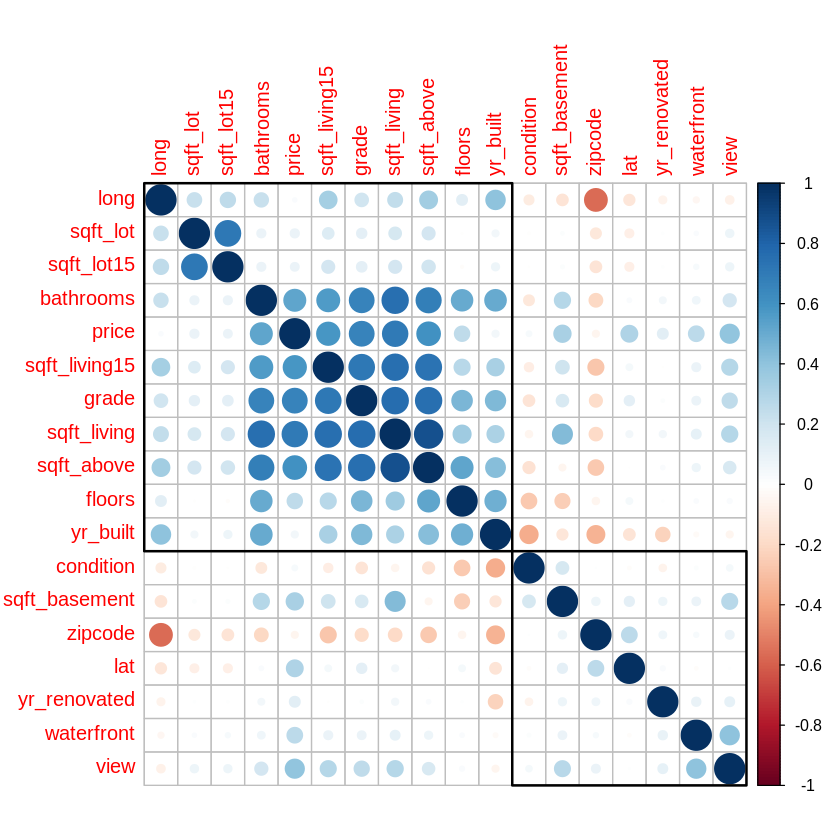

In [28]:
library(corrplot)
M = cor(house_new)
corrplot(M, order='hclust', addrect=2)

In [30]:
house_new$zipcode <- as.factor(house_new$zipcode)
house_new$yr_built <- as.factor(house_new$yr_built)
house_new$yr_renovated <- as.factor(house_new$yr_renovated)
#house_new$bedrooms <- as.factor(house_new$bedrooms)
house_new$bathrooms <- as.factor(house_new$bathrooms)
house_new$condition <- as.factor(house_new$condition)
house_new$grade <- as.factor(house_new$grade)
house_new$waterfront <- as.factor(house_new$waterfront)
house_new$view <- as.factor(house_new$view)

In [91]:
# Scale the Data
scale01 <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

house_new <- house_new %>%
  mutate_all(scale01)

In [92]:
set.seed(123)
train_idx <- sample(nrow(house_new), nrow(house_new)*0.7)
train_data <- house_new[train_idx, ]
test_data <- house_new[-train_idx, ]

In [45]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’




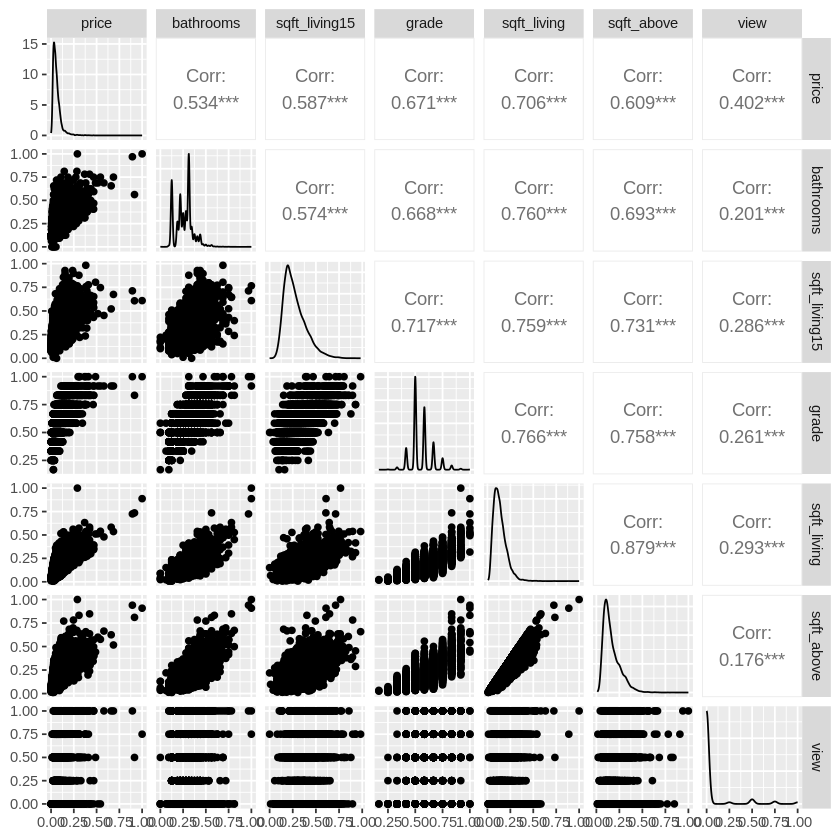

In [100]:
train_data %>%
  select('price','bathrooms','sqft_living15','grade','sqft_living','sqft_above','view') %>%
  GGally::ggpairs()

In [93]:
train_features <- train_data %>% select(-price)
test_features <- test_data %>% select(-price)

train_labels <- train_data %>% select(price)
test_labels <- test_data %>% select(price)

In [96]:
library(tidyverse)
library(neuralnet)


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [99]:
set.seed(12321)

price_NN1 <- neuralnet(price ~ bathrooms + sqft_living15 + grade + sqft_living + sqft_above + view, data = train_data, hidden = c(4, 1), act.fct = "logistic", rep=5)


Warning message:
“Algorithm did not converge in 1 of 1 repetition(s) within the stepmax.”


In [ ]:
plot(price_NN1, rep = 'best')